In [1]:
from nepc import nepc
from nepc.util import plotter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
plotter

<module 'nepc.util.plotter' from '/Users/adamson/projects/nepc/nepc/util/plotter.py'>

In [3]:
nepc

<module 'nepc.nepc' from '/Users/adamson/projects/nepc/nepc/nepc.py'>

In [4]:
pd.set_option('max_colwidth', 120)

In [5]:
cnx, cursor = nepc.connect(local=True)

In [6]:
species = nepc.table_as_df(cursor, "species")
species

,0,1,2
0,1,N,N
1,2,N-,N$^-$
2,3,N+,N$^+$
3,4,N2,N$_2$
4,5,N2+,N$_2^+$


In [7]:
models = nepc.table_as_df(cursor, "models")
models

,0,1,2
0,1,angus,cross sections used by J. Angus
1,2,pcm_n_1,plasma chemistry model - nitrogen - 1


In [8]:
processes = nepc.table_as_df(cursor, "processes")
processes

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,elastic,Elastic electron scattering,1,1,1,1,0,0,0,0,0,0
1,2,excitation,"""Excitation of atoms (electronic), inelastic electron scattering""",1,1,1,1,0,0,0,0,0,0
2,3,excitation_v,"""Excitation of atoms (electronic + vibrational), inelastic electron scattering""",1,1,1,1,0,0,1,1,0,0
3,4,excitation_j,"""Excitation of atoms (electronic + rotational), inelastic electron scattering""",1,1,1,1,0,0,0,0,1,1
4,5,excitation_vj,"""Excitation of atoms (electronic + vibrational + rotational), inelastic electron scattering""",1,1,1,1,0,0,1,1,1,1
5,6,s_deexcitation,Spontaneous de-excitation,1,1,0,0,0,1,0,0,0,0
6,7,s_deexcitation_v,Spontaneous de-excitation (vibrational),1,1,0,0,0,1,1,1,0,0
7,8,s_deexcitation_j,Spontaneous de-excitation (rotational),1,1,0,0,0,1,0,0,1,1
8,9,s_deexcitation_vj,Spontaneous de-excitation (vibrational and rotational),1,1,0,0,0,1,1,1,1,1
9,10,c_deexcitation,Collisional induced de-excitation,1,1,1,1,0,1,0,0,0,0


In [9]:
states = nepc.table_as_df(cursor, "states")
states

,0,1,2,3,4
0,1,1,N,N,"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": """", ""..."
1,2,1,N_2s22p3_4So,N($2s^22p^3 {}^4S^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""3"", ..."
2,3,1,N_2s22p3_2Do,N($2s^22p^3 {}^2D^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""3"", ..."
3,4,1,N_2s22p3_2Po,N($2s^22p^3 {}^2P^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""3"", ..."
4,5,1,N_2s22p2_3P_3s_4P,N($2s^22p^2$(${}^3P$)3s ${}^4P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
5,6,1,N_2s22p2_3P_3s_2P,N($2s^22p^2$(${}^3P$)3s ${}^2P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
6,7,1,N_2s22p4_4P,N($2s^22p^4$ ${}^4P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""4"", ..."
7,8,1,N_2s22p2_3P_3p_2So,N($2s^22p^2$(${}^3P$)3p ${}^2S^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
8,9,1,N_2s22p2_3P_3p_4Do,N($2s^22p^2$(${}^3P$)3p ${}^4D^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
9,10,1,N_2s22p2_3P_3p_4Po,N($2s^22p^2$(${}^3P$)3p ${}^4P^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."


In [10]:
angus = nepc.model(cursor, "angus")

In [11]:
len(angus)

367

In [12]:
angus[0]

{'cs_id': 3,
 'specie': 'N2',
 'process': 'excitation',
 'units_e': 1.0,
 'units_sigma': 1e-20,
 'ref': 'itikawa2006',
 'lhsA': 'N2(X1Sigmag+)',
 'lhsB': None,
 'rhsA': 'N2(w1Deltau)',
 'rhsB': None,
 'wavelength': None,
 'lhs_v': None,
 'rhs_v': None,
 'lhs_j': None,
 'rhs_j': None,
 'background': 'From itikawa2006, Table 9.a weighted average of the experimental cross sections has been taken with a polynomial least square fit to the energy dependence of the individual set of the cross sections. Thus the estimated uncertainty indicates the degree of the concurrence of the individual experimental results',
 'lpu': 0.3,
 'upu': 0.3,
 'e': [8.9,
  9.0,
  9.5,
  10.0,
  10.5,
  11.0,
  11.5,
  12.0,
  12.5,
  13.0,
  13.5,
  14.0,
  14.5,
  15.0,
  15.5,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  25.0,
  30.0,
  35.0,
  40.0,
  45.0,
  50.0],
 'sigma': [0.0001,
  0.002,
  0.024,
  0.043,
  0.061,
  0.076,
  0.088,
  0.096,
  0.102,
  0.105,
  0.105,
  0.103,
  0.099,
  0.093,
  0.086,
  0.0

In [13]:
angus_summary = nepc.model_summary_df(angus)
#angus_summary.style.highlight_null(null_color='red')
(angus_summary.loc[:20]
 .style
 .bar(subset=['E_upper'], align='mid', color='green', vmin=100, vmax=400)
 .background_gradient(subset=['sigma_max'], cmap='plasma')
 .background_gradient(subset=['lpu', 'upu'], cmap='plasma', low=0, high=.5)
 .highlight_null('red'))

/anaconda3/envs/nepc/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,specie,process,reaction,E_lower,E_upper,sigma_max,lpu,upu
0,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (w ${}^1\Delta_u$) + e$^-$,8.9,50,1.05e-21,0.3,0.3
1,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (C ${}^3\Pi_u$) + e$^-$,11,50,5.83e-21,0.3,0.3
2,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (a ${}^1\Pi_g$) + e$^-$,8,100,4.73e-21,0.25,0.25
3,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (a${}^{'}$ ${}^1\Sigma_u^-$) + e$^-$,9.4,50,1.13e-21,0.3,0.3
4,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (W ${}^3\Delta_u$) + e$^-$,9,50,2.38e-21,0.35,0.35
5,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (B ${}^3\Pi_g$) + e$^-$,8.55,50,3.39e-21,0.35,0.35
6,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (A ${}^3\Sigma_u^+$) + e$^-$,7.65,14.85,2.57e-21,0.4,0.4
7,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (A ${}^3\Sigma_u^+$) + e$^-$,15,50,1.6e-21,0.35,0.35
8,N2,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (B${}^{'} $ ${}^3\Sigma_u^-$) + e$^-$,10,50,1.65e-21,0.4,0.4
9,N2,dissociation_total,e$^-$ + N${}_2$ $\rightarrow$ N + N + e$^-$,12,400,1.855e-20,nan,nan


AttributeError: module 'nepc' has no attribute 'reaction_latex'

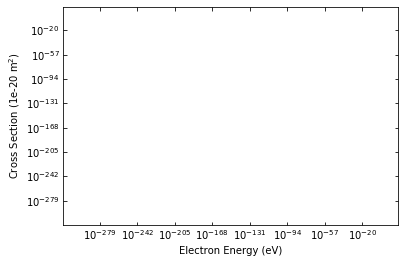

In [15]:
fig, ax = plt.subplots()
plotter.plot_nepc_model(ax, angus, 1E-20,
                        'excitation',
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
                        ylog=True, xlog=True, max_plots=8, width=8, height=4) 

In [ ]:
#cnx.close()